## Binary Classification with Both Algorithms

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [2]:
# Load dataset
df = pd.read_csv("diabetes.csv")

# Quick info
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# Features and target
X = df.drop("Outcome", axis=1)   # Outcome = 1 (diabetic), 0 (non-diabetic)
y = df["Outcome"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train size:", X_train.shape)
print("Test size :", X_test.shape)


Train size: (614, 8)
Test size : (154, 8)


In [4]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [5]:
log_reg = LogisticRegression(max_iter=500)
log_reg.fit(X_train_scaled, y_train)

y_pred_log = log_reg.predict(X_test_scaled)


In [6]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

y_pred_knn = knn.predict(X_test_scaled)


In [7]:
def evaluate_model(name, y_true, y_pred):
    print(f"--- {name} ---")
    print("Accuracy :", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall   :", recall_score(y_true, y_pred))
    print("F1-score :", f1_score(y_true, y_pred))
    print()

# Logistic Regression
evaluate_model("Logistic Regression", y_test, y_pred_log)

# KNN
evaluate_model("KNN (k=5)", y_test, y_pred_knn)


--- Logistic Regression ---
Accuracy : 0.7142857142857143
Precision: 0.6086956521739131
Recall   : 0.5185185185185185
F1-score : 0.56

--- KNN (k=5) ---
Accuracy : 0.7012987012987013
Precision: 0.5833333333333334
Recall   : 0.5185185185185185
F1-score : 0.5490196078431373



In [8]:
print("--- Classification Report: Logistic Regression ---")
print(classification_report(y_test, y_pred_log))

print("--- Classification Report: KNN ---")
print(classification_report(y_test, y_pred_knn))


--- Classification Report: Logistic Regression ---
              precision    recall  f1-score   support

           0       0.76      0.82      0.79       100
           1       0.61      0.52      0.56        54

    accuracy                           0.71       154
   macro avg       0.68      0.67      0.67       154
weighted avg       0.71      0.71      0.71       154

--- Classification Report: KNN ---
              precision    recall  f1-score   support

           0       0.75      0.80      0.78       100
           1       0.58      0.52      0.55        54

    accuracy                           0.70       154
   macro avg       0.67      0.66      0.66       154
weighted avg       0.69      0.70      0.70       154



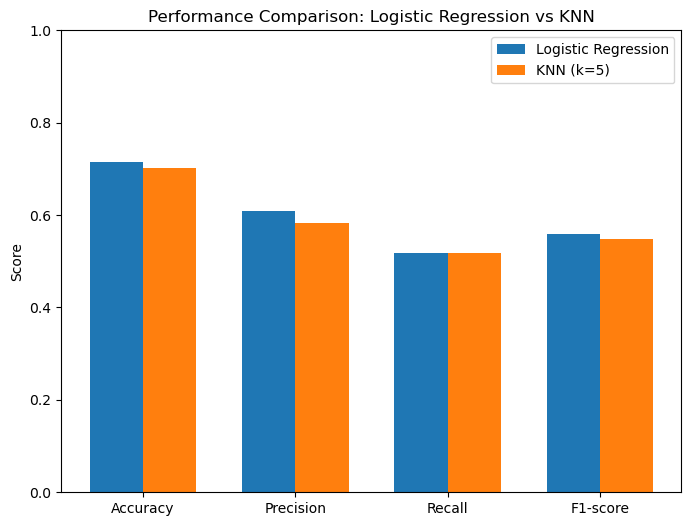

In [10]:
# Compute metrics for both models
metrics = ["Accuracy", "Precision", "Recall", "F1-score"]

log_reg_scores = [
    accuracy_score(y_test, y_pred_log),
    precision_score(y_test, y_pred_log),
    recall_score(y_test, y_pred_log),
    f1_score(y_test, y_pred_log)
]

knn_scores = [
    accuracy_score(y_test, y_pred_knn),
    precision_score(y_test, y_pred_knn),
    recall_score(y_test, y_pred_knn),
    f1_score(y_test, y_pred_knn)
]

# Plot side-by-side bar chart
x = np.arange(len(metrics))
width = 0.35

plt.figure(figsize=(8,6))
plt.bar(x - width/2, log_reg_scores, width, label="Logistic Regression")
plt.bar(x + width/2, knn_scores, width, label="KNN (k=5)")

plt.xticks(x, metrics)
plt.ylabel("Score")
plt.ylim(0, 1)  # since metrics range from 0 to 1
plt.title("Performance Comparison: Logistic Regression vs KNN")
plt.legend()
plt.show()

## Task Is Done!